# Featuring Data EDA

In [1]:
import pandas as pd

from featuringdata.featuresEDA import FeaturesEDA
from featuringdata.featureSelector import FeatureSelector

## Data Input

In [2]:
train_data = pd.read_csv('titanic_classification_train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Features EDA

In [5]:
eda = FeaturesEDA(report_prefix='Titanic', target_col="Survived")

In [6]:
# Run this to get an abbreviated PDF report (similar information to dataframe.info() and dataframe.describe()):
# eda.run_initial_eda(train_data)

In [7]:
# Run this to get a full EDA report in PDF format in the local directory:
eda.run_full_eda(train_data, run_collinear=True, generate_plots=True)

--- Null Values Analysis ---
Out of 12 total data columns, there are 3 columns with at least 1 null value.

Out of 891 total rows/data samples, 708 rows have at least one null value.
The row with the most NULL values has 2 NULLs.

--- Sorting Numeric and Non-numeric Columns / Unique Values ---
There are 6 numeric columns and 5 non-numeric columns.
There are 0 non-numeric columns with just a single value and will be removed.
There are 3 non-numeric columns with a very large number of unique values and will be removed.
After the above adjustments, there are now 8 data columns, with 6 numeric columns and 2 non-numeric/categorical columns.

--- Target Column ---
For the chosen target column ('Survived'), this appears to be a classification problem.
The target column has 0 null values and 2 unique values.

--- Feature Correlations ---
For random forest (RF) correlation measure, using 50 trees and min_samples_leaf=27.

Running correlations of numeric features to target variable...


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

For random forest (RF) correlation measure, using 50 trees and min_samples_leaf=3.

Running correlations of non-numeric features to target variable...


  0%|          | 0/2 [00:00<?, ?it/s]

Generating plots of numeric features...


  0%|          | 0/6 [00:00<?, ?it/s]

Generating plots of non-numeric/categorical features...


  0%|          | 0/2 [00:00<?, ?it/s]


--- Files Output ---
File 'Titanic_EDA_Report_20240503_165215.pdf' has been saved in current working directory.
All PNG files can be found in ./Titanic_EDA_plots_20240503_165215.


In [8]:
eda.master_columns_df.head()

,Num of Nulls,Frac Null,dtype,Column Type (orig),Num Unique Values,Column Note,Column Type,Count not-Null,Mutual Info,Random Forest,COLLIN Avg Pearson Corr,COLLIN Avg RF Corr,COLLIN Max Pear Corr Feature,COLLIN Max Pear,COLLIN Max RF Corr Feature,COLLIN Max RF Corr,RF_norm
PassengerId,0,0.0,int64,numeric,891,None,numeric,891,0.01,0.08,0.03,0.03,SibSp,-0.06,Age,0.05,NaN
Survived,0,0.0,int64,target,2,None,target,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,0,0.0,int64,numeric,3,None,numeric,891,0.06,0.27,0.21,0.15,Fare,-0.55,Fare,0.53,NaN
Name,0,0.0,object,non-numeric,891,remove,None,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,0,0.0,object,non-numeric,2,None,non-numeric,891,0.15,0.54,NaN,NaN,NaN,NaN,NaN,NaN,0.54


In [9]:
print(len(eda.numeric_cols), len(eda.non_numeric_cols))

6 2


### Additional Stuff

## Feature Selector

In [10]:
parameter_dict = {'max_depth': [3, 4, 5, 6], 'gamma': [0, 1, 5],
                  'min_child_weight': [0, 1, 5], 'max_delta_step': [0, 1, 5]}

In [11]:
print(eda.target_type)

classification


In [12]:
fselect = FeatureSelector(eda.numeric_cols, eda.non_numeric_cols, report_prefix=eda.report_prefix,
                          target_col=eda.target_col, target_type=eda.target_type, target_log=False,
                          parameter_dict=parameter_dict)  #val_size=0.15)

Starting number of feature columns: 11

Running grid search at Iteration 0 on data split 1...


  0%|          | 0/108 [00:00<?, ?it/s]

Running grid search at Iteration 0 on data split 2...


  0%|          | 0/108 [00:00<?, ?it/s]


Iter 0 -- New best params: {'gamma': 0, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 0}

Iter 0 11 0.41293 Sex_female 0.6
Iter 1 10 0.41293 Sex_female 0.6
Iter 2 9 0.41193 Sex_female 0.59
Iter 3 8 0.41724 Sex_female 0.64
Iter 4 7 0.4073 Sex_female 0.68
Iter 5 6 0.39651 Sex_female 0.63
Iter 6 5 0.39422 Sex_female 0.59
Iter 7 4 0.42621 Sex_female 0.7
Iter 8 3 0.43261 Sex_female 0.68
Iter 9 2 0.47132 Sex_female 0.89
Iter 10 1 0.52312 Sex_female 1.0

Best results: (1) 0.39422 [6], (2) 0.36394 [0]

Using Iter 0 from data split 2 with {'max_depth': 5, 'gamma': 0, 'min_child_weight': 0, 'max_delta_step': 0}
[0]	validation_0-logloss:0.55968
[1]	validation_0-logloss:0.48915
[2]	validation_0-logloss:0.45256
[3]	validation_0-logloss:0.42211
[4]	validation_0-logloss:0.40729
[5]	validation_0-logloss:0.39230
[6]	validation_0-logloss:0.38600
[7]	validation_0-logloss:0.38028
[8]	validation_0-logloss:0.38122
[9]	validation_0-logloss:0.37232
[10]	validation_0-logloss:0.37819
[11]	validation

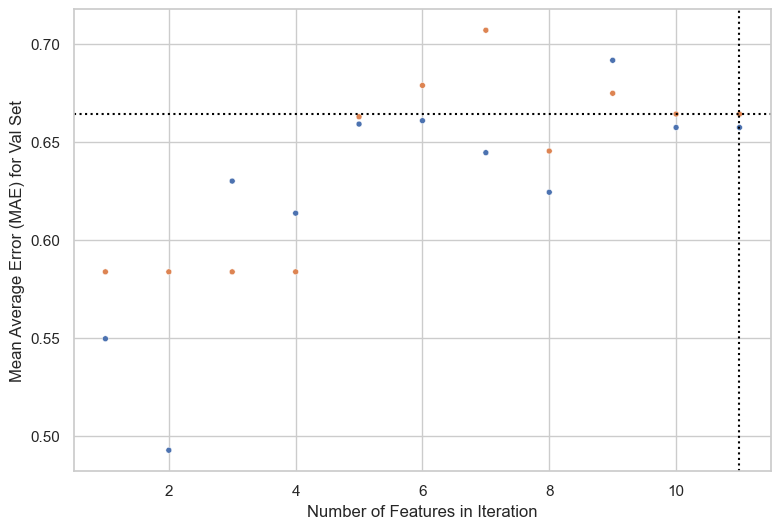

In [13]:
# training_results_df = fselect.run(train_data)
# Optional: Include the 'master_columns_df' from FeaturesEDA to get a
#   comparison plot between the individual feature correlations with the
#   target, compared with the feature importances:
training_results_df = fselect.run(train_data, master_columns_df=eda.master_columns_df)

### Additional Stuff